In [2910]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score,roc_auc_score,cohen_kappa_score

In [2911]:
dataset = pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2912]:
types=dataset.dtypes
print(types)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [2913]:
set_option('display.width',100)
set_option('precision',3)
description = dataset.describe()
print(description)

           age      sex       cp  trestbps     chol      fbs  restecg  thalach    exang  oldpeak  \
count  303.000  303.000  303.000   303.000  303.000  303.000  303.000  303.000  303.000  303.000   
mean    54.366    0.683    0.967   131.624  246.264    0.149    0.528  149.647    0.327    1.040   
std      9.082    0.466    1.032    17.538   51.831    0.356    0.526   22.905    0.470    1.161   
min     29.000    0.000    0.000    94.000  126.000    0.000    0.000   71.000    0.000    0.000   
25%     47.500    0.000    0.000   120.000  211.000    0.000    0.000  133.500    0.000    0.000   
50%     55.000    1.000    1.000   130.000  240.000    0.000    1.000  153.000    0.000    0.800   
75%     61.000    1.000    2.000   140.000  274.500    0.000    1.000  166.000    1.000    1.600   
max     77.000    1.000    3.000   200.000  564.000    1.000    2.000  202.000    1.000    6.200   

         slope       ca     thal   target  
count  303.000  303.000  303.000  303.000  
mean     1.

In [2914]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [2915]:
target_counts = dataset.groupby('target').size()
print(target_counts)

target
0    138
1    165
dtype: int64


In [2916]:
set_option('display.width',100)
set_option('precision',3)
correlations = dataset.corr(method='pearson')
print(correlations)

            age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  oldpeak  slope  \
age       1.000 -0.098 -0.069     0.279  0.214  0.121   -0.116   -0.399  0.097    0.210 -0.169   
sex      -0.098  1.000 -0.049    -0.057 -0.198  0.045   -0.058   -0.044  0.142    0.096 -0.031   
cp       -0.069 -0.049  1.000     0.048 -0.077  0.094    0.044    0.296 -0.394   -0.149  0.120   
trestbps  0.279 -0.057  0.048     1.000  0.123  0.178   -0.114   -0.047  0.068    0.193 -0.121   
chol      0.214 -0.198 -0.077     0.123  1.000  0.013   -0.151   -0.010  0.067    0.054 -0.004   
fbs       0.121  0.045  0.094     0.178  0.013  1.000   -0.084   -0.009  0.026    0.006 -0.060   
restecg  -0.116 -0.058  0.044    -0.114 -0.151 -0.084    1.000    0.044 -0.071   -0.059  0.093   
thalach  -0.399 -0.044  0.296    -0.047 -0.010 -0.009    0.044    1.000 -0.379   -0.344  0.387   
exang     0.097  0.142 -0.394     0.068  0.067  0.026   -0.071   -0.379  1.000    0.288 -0.258   
oldpeak   0.210  0.0

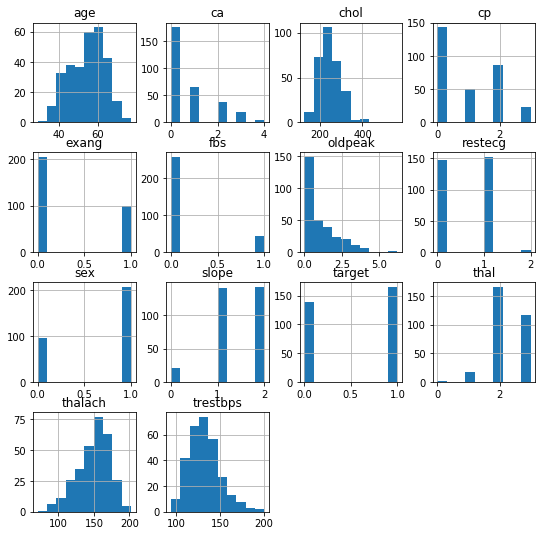

In [2917]:
dataset.hist(figsize=(9,9))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260146E40C8>]],
      dtype=object)

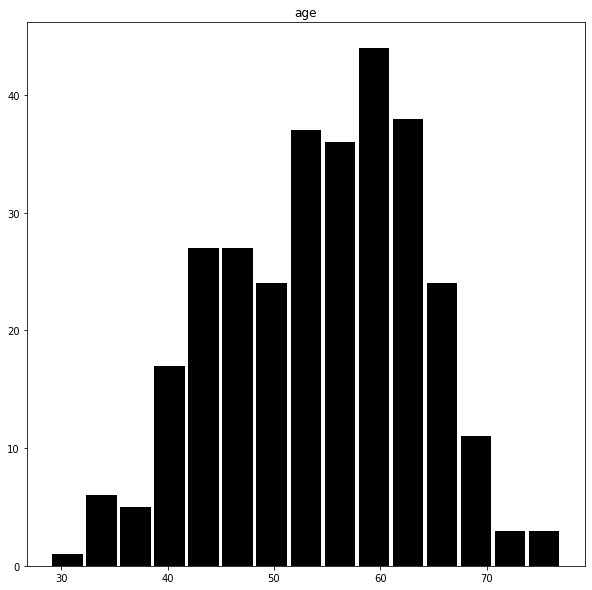

In [2918]:
dataset.hist(column='age', bins=15, grid=False, figsize=(10,10), color='#000000', zorder=2, rwidth=0.9)

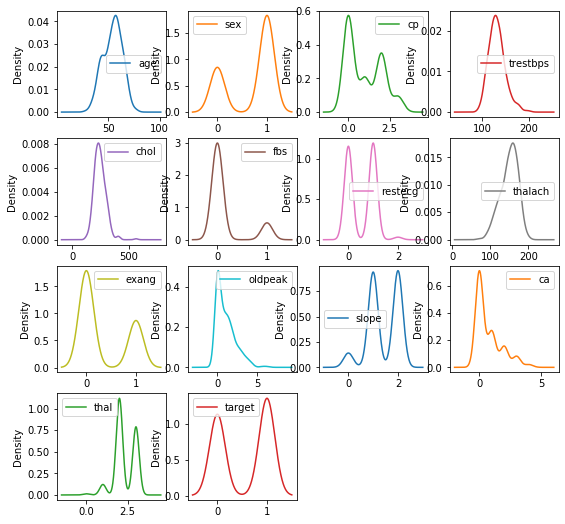

In [2919]:
dataset.plot(kind='density', subplots=True, figsize=(9,9), layout=(4,4), sharex=False)
plt.show()

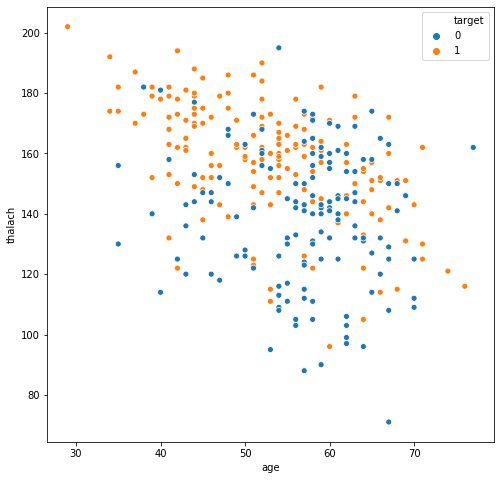

In [2920]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=dataset['age'],y=dataset['thalach'],hue=dataset['target'])
plt.xlabel('age')
plt.ylabel('thalach')
plt.show()

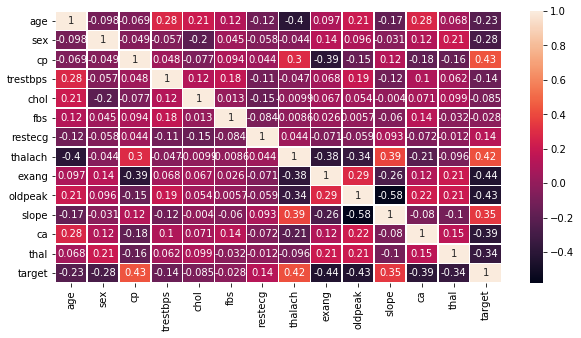

In [2921]:
j=dataset.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(j, annot=True, linewidths=.5, ax=ax)

# Preparing Data for Machine Learning

In [2922]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Editing Categorical Variables

In [2923]:
cat_col =["sex","cp","fbs","restecg","exang","slope","ca","thal"]
dataset = pd.get_dummies(dataset, columns = cat_col)

In [2924]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Deleting Extra Columns

In [2925]:
dataset = dataset.drop(["sex_0","cp_0","fbs_0","restecg_0",
            "exang_0","slope_0","ca_0","thal_0"],axis = 1)

In [2926]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [2927]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3',
       'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

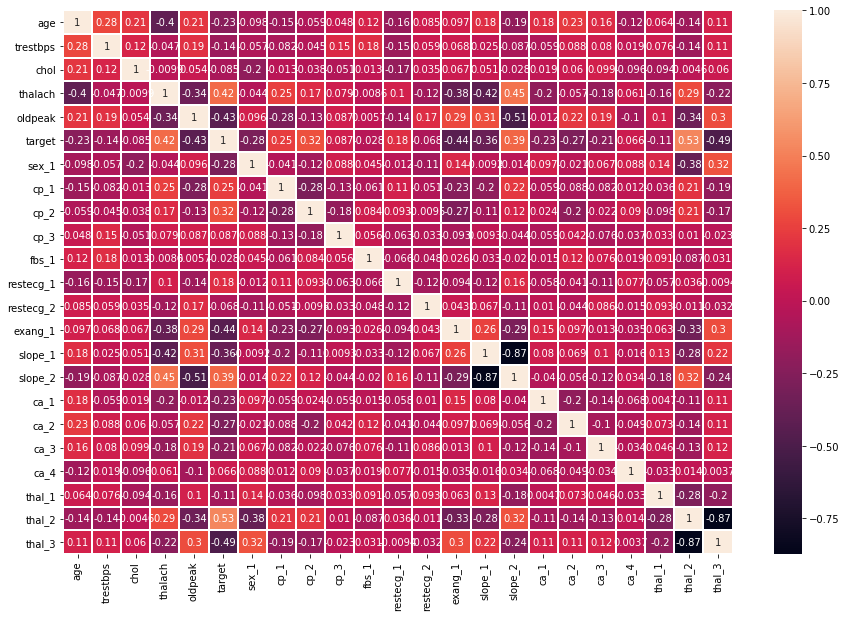

In [2928]:
j=dataset.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(j, annot=True, linewidths=1, ax=ax)

In [2929]:
dataset = dataset.drop(["slope_2","thal_2"],axis=1)

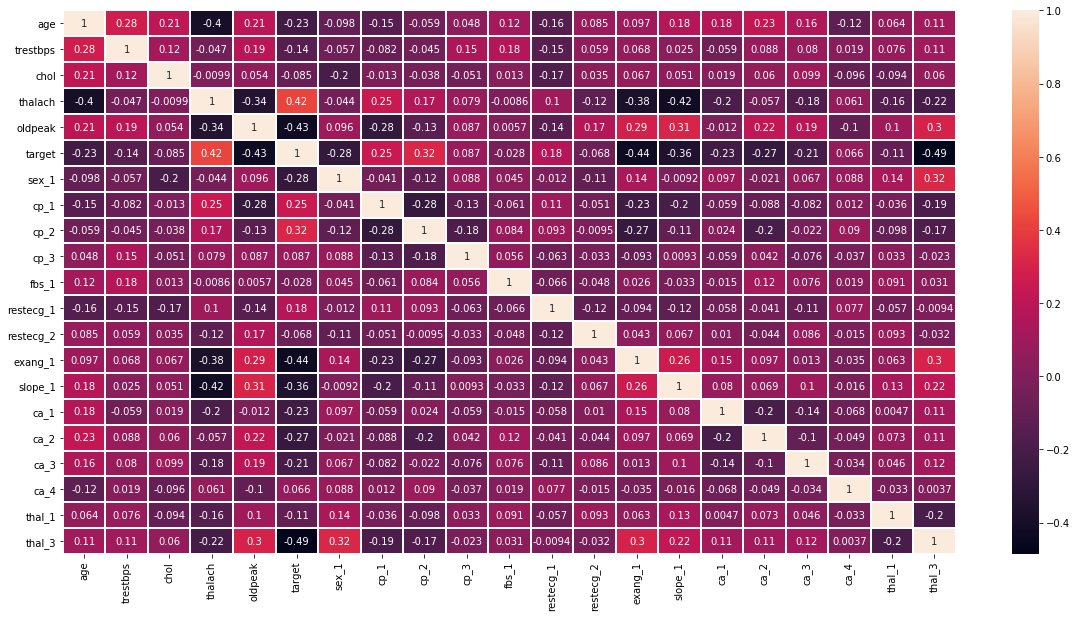

In [2930]:
j=dataset.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(j, annot=True, linewidths=1, ax=ax)

In [2931]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_1', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_1', 'thal_3'],
      dtype='object')

In [2932]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,37,130,250,187,3.5,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56,120,236,178,0.8,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


### Preparing Training and Test Data

In [2933]:
X = dataset.drop(["target"], axis=1)
Y = dataset["target"]

In [2934]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,
                                                test_size=0.25,
                                                random_state=42)

In [2935]:
print(x_train)

     age  trestbps  chol  thalach  oldpeak  sex_1  cp_1  cp_2  cp_3  fbs_1  restecg_1  restecg_2  \
287   57       154   232      164      0.0      1     1     0     0      0          0          0   
282   59       126   218      134      2.2      1     0     1     0      1          1          0   
197   67       125   254      163      0.2      1     0     0     0      1          1          0   
158   58       125   220      144      0.4      1     1     0     0      0          1          0   
164   38       138   175      173      0.0      1     0     1     0      0          1          0   
..   ...       ...   ...      ...      ...    ...   ...   ...   ...    ...        ...        ...   
188   50       140   233      163      0.6      1     0     1     0      0          1          0   
71    51        94   227      154      0.0      1     0     1     0      0          1          0   
106   69       160   234      131      0.1      1     0     0     1      1          0          0   


# KNeighborsClassifier

In [2936]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [2937]:
print('accuracy score for tranining data: ',accuracy_score(y_pred1,y_train))
print('accuracy score for test data: ',accuracy_score(y_pred, y_test))

accuracy score for tranining data:  0.7577092511013216
accuracy score for test data:  0.6973684210526315


### Standardization

In [2938]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform (x_test)
x_train_std[0:5]

array([[ 0.26745345,  1.40362838, -0.26473008,  0.63335882, -0.93126602,
         0.71647284,  2.34216018, -0.6815542 , -0.28452132, -0.382707  ,
        -1.04046567, -0.13392991, -0.6815542 , -0.92771533,  1.88148877,
        -0.34384095, -0.27537136, -0.11572751, -0.24647041, -0.78830741],
       [ 0.4831264 , -0.24391769, -0.52665792, -0.69663611,  1.06219412,
         0.71647284, -0.42695628,  1.46723474, -0.28452132,  2.61296502,
         0.96110812, -0.13392991, -0.6815542 ,  1.07791686,  1.88148877,
        -0.34384095, -0.27537136, -0.11572751,  4.05728215, -0.78830741],
       [ 1.34581817, -0.30275862,  0.1468708 ,  0.58902565, -0.75004237,
         0.71647284, -0.42695628, -0.6815542 , -0.28452132,  2.61296502,
         0.96110812, -0.13392991, -0.6815542 ,  1.07791686, -0.531494  ,
         2.90832139, -0.27537136, -0.11572751, -0.24647041,  1.26854066],
       [ 0.37528992, -0.30275862, -0.48923966, -0.25330447, -0.56881872,
         0.71647284,  2.34216018, -0.6815542 , -

# Feature Extraction - PCA(Principal Component Analysis)

In [2939]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None, random_state=42)

pca.fit_transform(x_train_std)
pca.fit_transform(x_test_std)
exp_var = pca.explained_variance_ratio_

np.set_printoptions(suppress=True)
print(exp_var)

[0.17453533 0.08892295 0.08281615 0.07978512 0.07603225 0.06941386
 0.06146192 0.05551567 0.05307002 0.04821938 0.04432925 0.0344092
 0.0276327  0.02645546 0.02404039 0.01851864 0.01489363 0.01072026
 0.00922784 0.        ]


In [2940]:
exp_var = np.round(pca.explained_variance_ratio_*100, decimals=1 )
labels = ['PC'+ str(x) for x in range(1, len(exp_var)+1)]

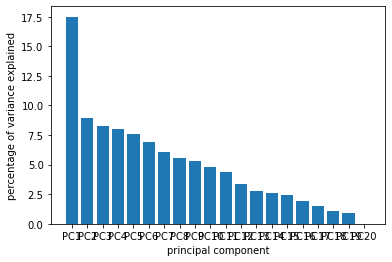

In [2941]:
plt.bar(x=range(1,len(exp_var)+1),height = exp_var, tick_label=labels)
plt.ylabel("percentage of variance explained")
plt.xlabel("principal component")
plt.show()

In [2942]:
pca = PCA(n_components=14, random_state=42)

x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.fit_transform(x_test_std)
exp_var = pca.explained_variance_ratio_

np.set_printoptions(suppress=True)
print(exp_var)

[0.17453533 0.08892295 0.08281615 0.07978512 0.07603225 0.06941386
 0.06146192 0.05551567 0.05307002 0.04821938 0.04432925 0.0344092
 0.0276327  0.02645546]


In [2943]:
print(x_train_pca)

[[-1.20389085  0.0466399   0.56921888 ...  0.57920027 -0.15512448
   0.40087755]
 [ 1.30375137  0.30074252  0.55560055 ... -0.71639912  1.57833471
  -2.29288337]
 [ 0.78235227  0.44360151  1.81904042 ...  0.77687628  0.18767339
  -2.36228247]
 ...
 [ 1.44744717  1.58717357  2.28654384 ...  1.48486916 -0.39518219
   0.20037386]
 [-0.34710754 -0.97572852  0.12797474 ... -0.01652484 -0.42431782
   0.04739455]
 [-1.98584463  1.09927836  1.80822414 ...  1.00990196  0.11745554
  -0.1471064 ]]


# Parameter Optimization

In [2944]:
#?KNeighborsClassifier

In [2945]:
knc = KNeighborsClassifier()

In [2946]:
knc_params = {"n_neighbors":np.arange(1,50),
             "leaf_size":[2,5,10,20,30,50,80,100]}

In [2957]:
knc_tuned = GridSearchCV(knc, knc_params, cv=10, n_jobs=-1, verbose=2, scoring="accuracy")
knc_tuned.fit(x_train_pca, y_train)

Fitting 10 folds for each of 392 candidates, totalling 3920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2700 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 3920 out of 3920 | elapsed:    8.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [2, 5, 10, 20, 30, 50, 80, 100],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [2958]:
knc_tuned.best_score_

0.8284584980237154

In [2959]:
knc_tuned.best_params_

{'leaf_size': 2, 'n_neighbors': 25}

In [2960]:
knc_final = KNeighborsClassifier(n_neighbors=25, leaf_size=2).fit(x_train_pca, y_train)
y_pred = knc_final.predict(x_test_pca)
print("Final accuracy score",accuracy_score(y_test, y_pred))

Final accuracy score 0.8289473684210527


# Precision and Recall 

In [2952]:
print(confusion_matrix(y_test, y_pred))

[[25 10]
 [ 3 38]]


test


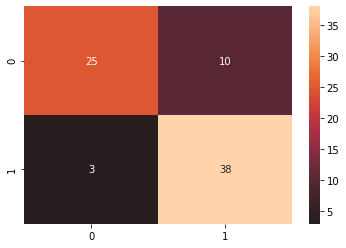

In [2953]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,center=True,annot=True,fmt='d')
print('test')

In [2954]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        35
           1       0.79      0.93      0.85        41

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.82        76
weighted avg       0.84      0.83      0.83        76



In [2964]:
print('ROC eğrisindeki alanı:',roc_auc_score(y_test, y_pred))

ROC eğrisindeki alanı: 0.8205574912891986


In [2961]:
print("Precision:", precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test, y_pred))

Precision: 0.7916666666666666
Recall: 0.926829268292683


In [2963]:
print('ROC eğrisindeki alanı:',roc_auc_score(y_test, y_pred))
print("f1 score",f1_score(y_pred, y_test))
print('cohen kappa test', cohen_kappa_score(y_test, y_pred))


ROC eğrisindeki alanı: 0.8205574912891986
f1 score 0.8539325842696629
cohen kappa test 0.6506364922206507
